In [2]:
import pandas as pd

In [3]:
frac = 0.05

df = pd.read_csv('./data/RFC_'+str(frac)+'ARG.csv')

df['P10'] = 2 - df['P10']
df['P09'] = df.P09.replace(5, 4) #Polimodal tomado como secundario 
df['P0910'] = df.P09.astype(str) + df.P10.astype(str)

df.shape

(2187886, 44)

In [4]:
pd.options.display.max_columns = 99

df_edad = df#.loc[df.P03.isin(range(0, 80))]

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_height()
        diff = current_width - new_value

        # we change the bar width
        patch.set_height(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [6]:
# Elegir dptos
pd.set_option('display.max_colwidth', -1)

DPTOs = df_edad.DPTO.unique()

DPTOs = df_edad.groupby(['DPTO']).count()['PERSONA_REF_ID'].sort_values().tail(10).index

# traer info
DPTO_ref = pd.read_csv('./../../Documents/censo_geo/DPTO.csv', ';', index_col='DPTO')
PROV_ref = pd.read_csv('./../../Documents/censo_geo/PROV.csv', ';')
DPTO_ref = DPTO_ref[['NOMDPTO', 'PROV_REF_ID']].loc[DPTOs].merge(PROV_ref)

In [1]:
colors = ['#d3d3d3','#d3d3d3','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928', '#d3d3d3','#d3d3d3','#636363']
colors2 = ['#d9d9d900','#d9d9d900','#d9d9d900', '#d9d9d9B3', '#bdbdbdB3', '#969696B3', '#636363B3', '#252525B3']

empl_dict = {'CAT_OCUP_1.0': 'Patrón',
 'CAT_OCUP_2.0': 'Cuenta propia',
 'CAT_OCUP_3.0': 'Empleado',
 'CAT_OCUP_4.0': 'Trabajo familiar',
 'CAT_INAC_1.0': 'Jubilado',
 'CAT_INAC_2.0': 'Rentista',
 'CAT_INAC_3.0': 'Estudiante',
 'CAT_INAC_4.0': 'Ama de casa',
 'CAT_INAC_5.0': 'Menores',
 'CAT_INAC_6.0': 'Discapacitado',
 'CAT_INAC_7.0': 'Otros',
 'CAT_OCUP_1.0': 'Patrón',
 'CAT_OCUP_2.0': 'Cuenta propia',
 'CAT_OCUP_9.0': 'na',
 'PP07K_1.0': 'Formal',
 'PP07K_3.0': 'Formal',
 'PP07K_4.0': 'Informal'}

educ_dict = {'P0910_2': 'No fue',
 'P0910_12': 'Inicial',
 'P0910_20': 'Primaria',
 'P0910_21': '(completa)',
 'P0910_30': 'EGB',
 'P0910_31': '(completa)',
 'P0910_40': 'Secundaria',
 'P0910_41': '(completa)',
 'P0910_50': 'Polimodal',
 'P0910_51': '(completo)',
 'P0910_60': 'Terciario',
 'P0910_61': '(completo)',
 'P0910_70': 'Universidad',
 'P0910_71': '(completa)',
 'P0910_80': 'Postgrado',
 'P0910_81': '(completo)',
 'P0910_92': 'na'}

NOMDPTO    Merlo       
NOMPROV    Buenos Aires
Name: 0, dtype: object

No handles with labels found to put in legend.


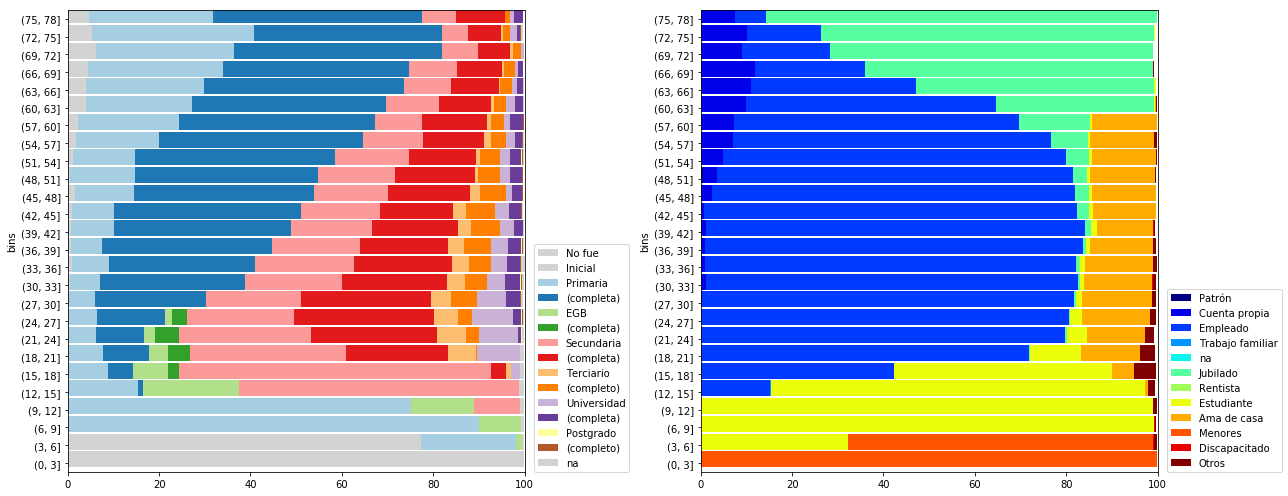

NOMDPTO    Almirante Brown
NOMPROV    Buenos Aires   
Name: 1, dtype: object

No handles with labels found to put in legend.


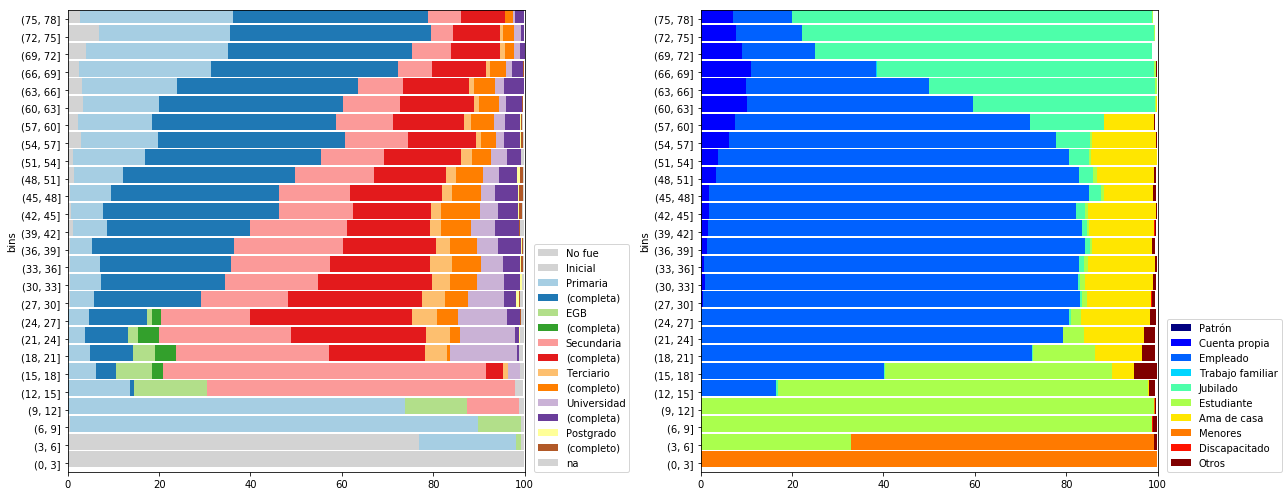

NOMDPTO    Lomas de Zamora
NOMPROV    Buenos Aires   
Name: 2, dtype: object

No handles with labels found to put in legend.


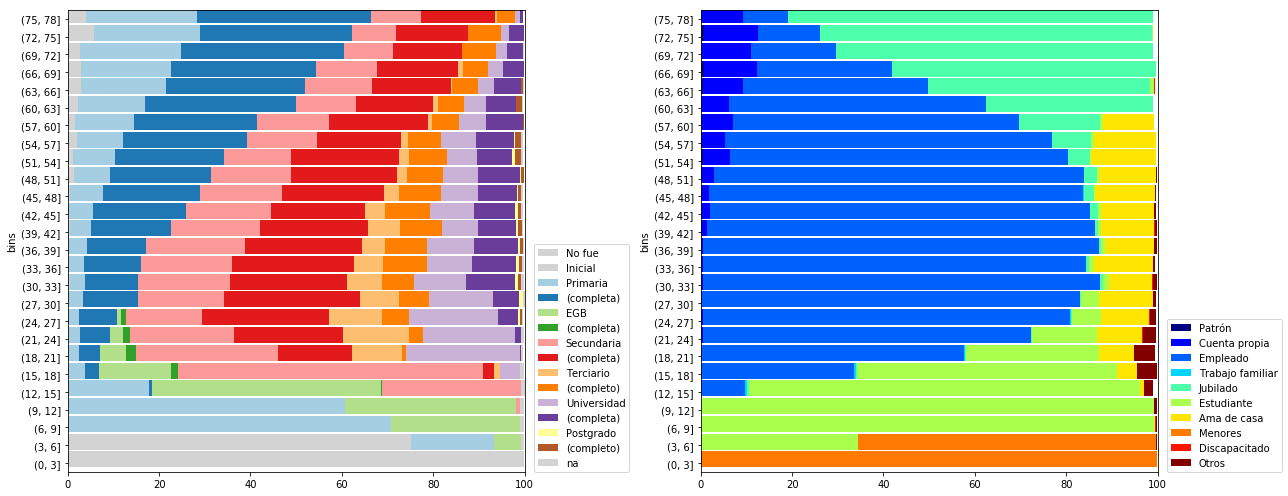

NOMDPTO    General Pueyrredón
NOMPROV    Buenos Aires      
Name: 3, dtype: object

No handles with labels found to put in legend.


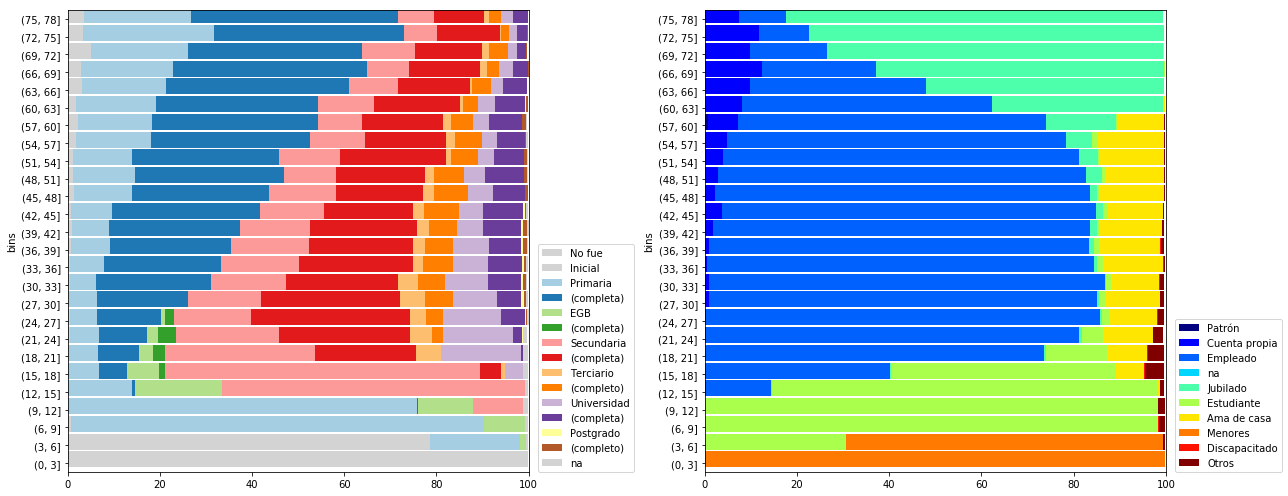

NOMDPTO    Quilmes     
NOMPROV    Buenos Aires
Name: 4, dtype: object

No handles with labels found to put in legend.


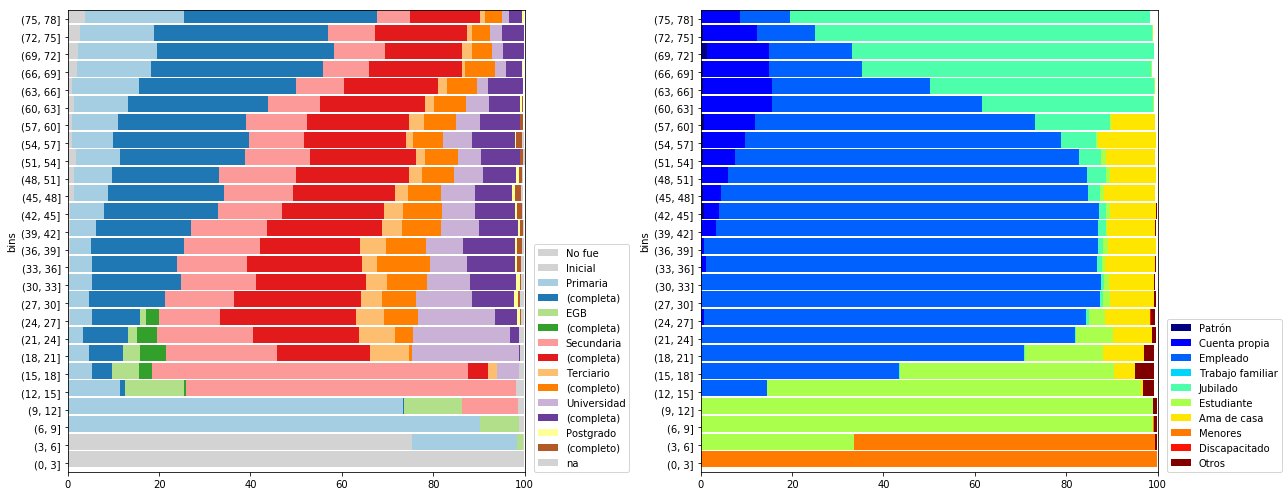

NOMDPTO    La Plata    
NOMPROV    Buenos Aires
Name: 5, dtype: object

No handles with labels found to put in legend.


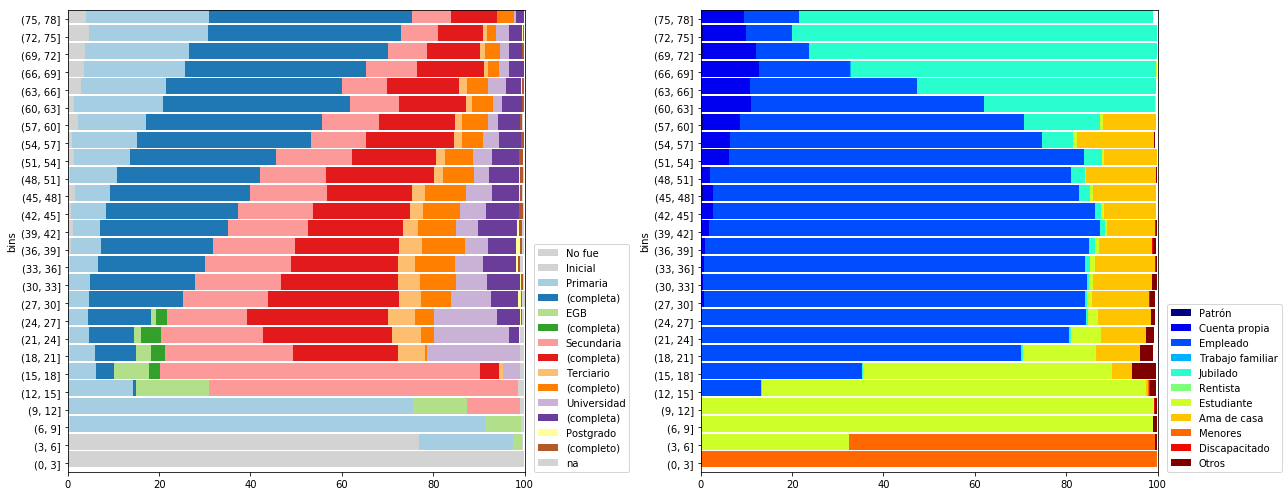

NOMDPTO    La Matanza  
NOMPROV    Buenos Aires
Name: 6, dtype: object

No handles with labels found to put in legend.


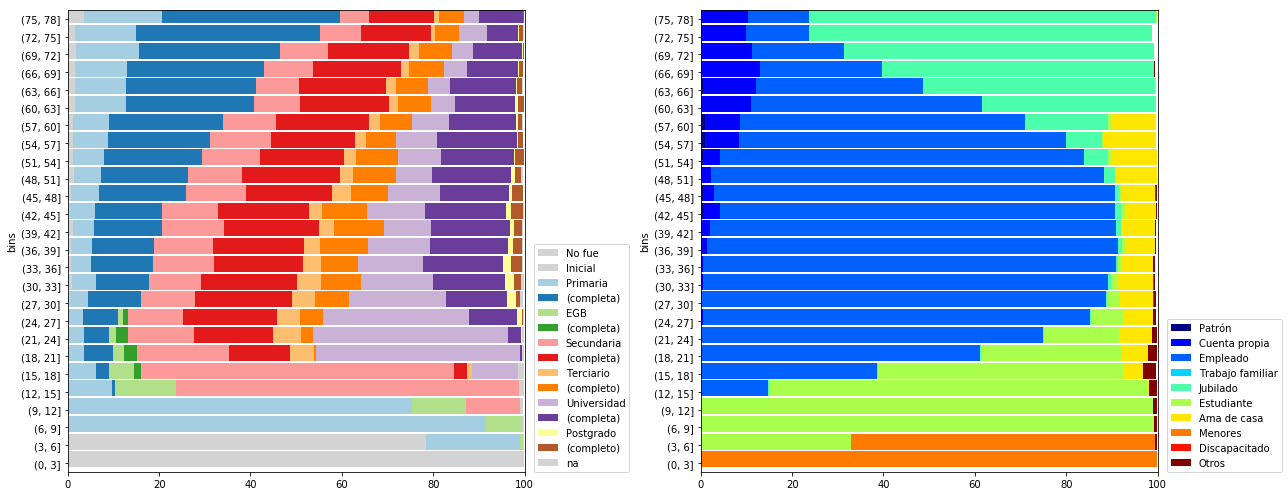

NOMDPTO    Capital
NOMPROV    Salta  
Name: 7, dtype: object

No handles with labels found to put in legend.


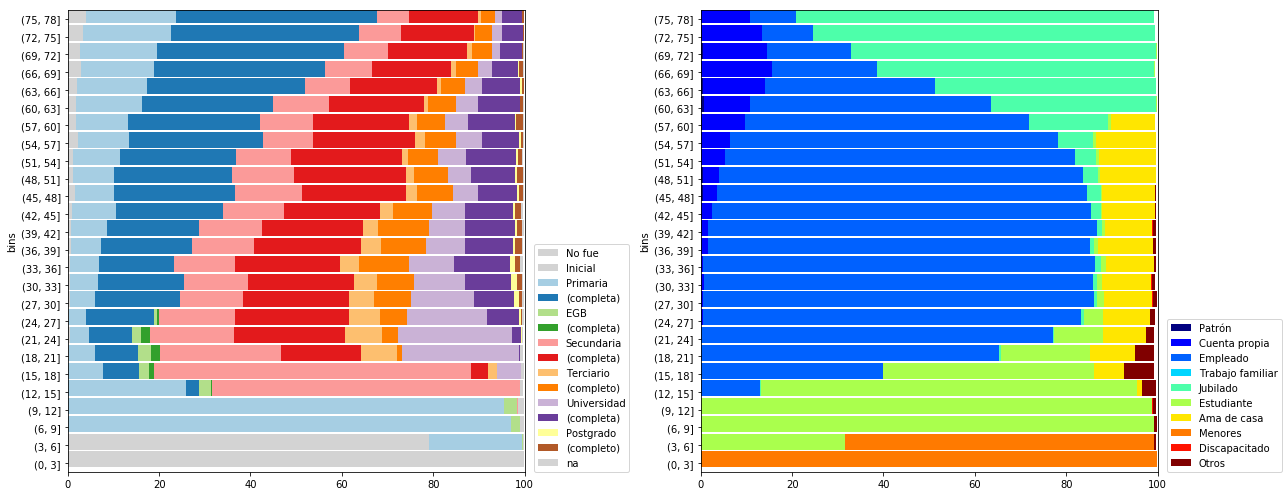

NOMDPTO    Rosario 
NOMPROV    Santa Fe
Name: 8, dtype: object

No handles with labels found to put in legend.


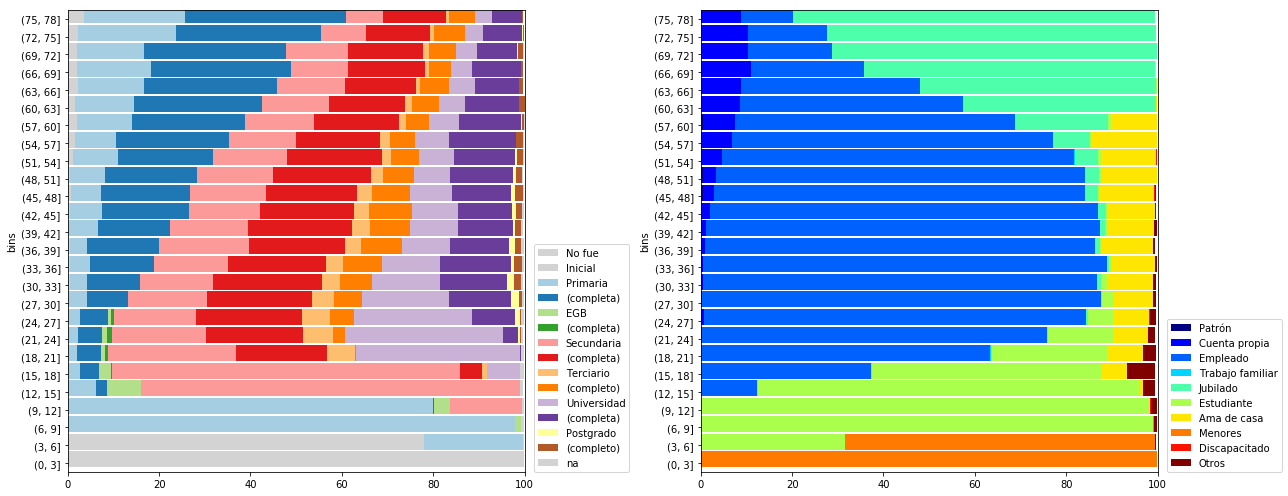

NOMDPTO    Capital
NOMPROV    Córdoba
Name: 9, dtype: object

No handles with labels found to put in legend.


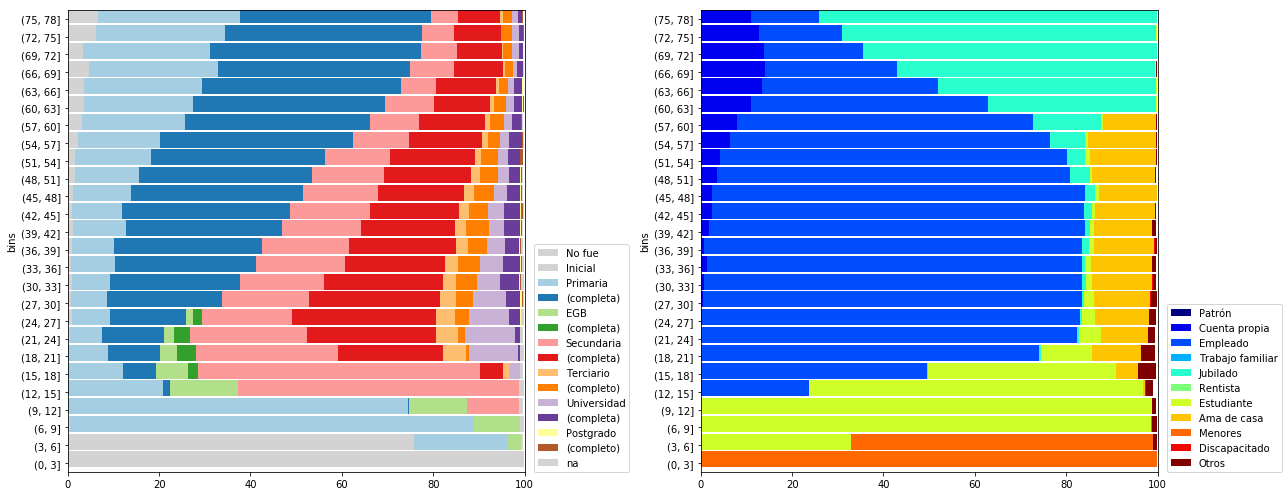

In [10]:

import warnings
warnings.filterwarnings('ignore')

df_edad['bins'] = pd.cut(df_edad.P03, range(0, 81, 3))
col_edad = 'bins'


for i,partido in enumerate(DPTOs):
    display(DPTO_ref[['NOMDPTO', 'NOMPROV']].loc[i])
    df_edad_part = df_edad.loc[df_edad.DPTO == partido]
    
    # Educacion
    df_edad_part['P0910'] = (df_edad_part['P09'].astype(str) + df_edad_part['P10'].astype(str)).astype(int)
    df_edad_part_educ = df_edad_part[['PERSONA_REF_ID','DPTO',col_edad,'P07','P08', 'P0910']]
    sum_ = pd.get_dummies(df_edad_part_educ, columns = ['P07', 'P08','P0910']).groupby(col_edad).sum()
    total_ = df_edad_part_educ.groupby(col_edad).count().iloc[:, 1]
    perc = 100*np.round(sum_.div(total_, 0), 3)
    
    # Empleo 1
#     df_edad_part_empl = df_edad_part[['PERSONA_REF_ID','DPTO','P03','PP07G1','PP07G2','PP07G3','PP07G4','PP07G_59','PP07H','PP07I','PP07J','PP07K']]
    df_edad_part_empl = df_edad_part[['PERSONA_REF_ID','DPTO',col_edad,'CONDACT', 'CAT_OCUP', 'CAT_INAC']]
    sum_e = pd.get_dummies(df_edad_part_empl, columns = ['CONDACT', 'CAT_OCUP', 'CAT_INAC']).groupby(col_edad).sum()
    total_e = df_edad_part_empl.groupby(col_edad).count().iloc[:, 1]
    perce = 100*np.round(sum_e.div(total_e, 0), 3)
    
    # Empleo 2
    df_edad_part_empl2 = df_edad_part[['PERSONA_REF_ID','DPTO',col_edad,'PP07G1','PP07G2','PP07G3','PP07G4','PP07G_59','PP07H','PP07I','PP07J','PP07K']]
    sum_e2 = pd.get_dummies(df_edad_part_empl2, columns = ['PP07G1','PP07G2','PP07G3','PP07G4','PP07G_59','PP07H','PP07I','PP07J','PP07K']).groupby(col_edad).sum()
    total_e2 = df_edad_part_empl2.groupby(col_edad).count().iloc[:, 1]
    perce2 = 100*np.round(sum_e2.div(total_e2, 0), 3)
    perce3 = pd.concat([perce[[col for col in perce.columns if 'CAT_OCUP' in col][1:3]], perce2[[col for col in perce2.columns if 'PP07K' in col][1:]]], axis = 1) # Anadir cuenta propistas. No cuentan para pregunta cobro sin recibo

    
    fig, axs = plt.subplots(1, 2, figsize = (18, 7))

#     perc.rolling(3, win_type='triang').mean()[[col for col in perc.columns if 'P0910' in col]].plot(kind='barh', stacked=True, ax = axs[0], color = colors)
    perc[[col for col in perc.columns if 'P0910' in col]].plot(kind='barh', stacked=True, ax = axs[0], color = colors)
    change_width(axs[0], .9)
    axs[0].set_xlim(0, 100)
    plt.legend(loc = (1,0))    
    handles, labels = axs[0].get_legend_handles_labels()
    labels = [educ_dict[l] for l in labels]
    axs[0].legend([handle for i,handle in enumerate(handles)], [label for i,label in enumerate(labels)], loc = (1.02,0))


    
#     perce.rolling(3, win_type='triang').mean()[[col for col in perce.columns if 'CAT_OCUP' in col][1:] + [col for col in perce.columns if 'CAT_INAC' in col][1:]].plot(
#         kind='barh', stacked=True, ax = axs[1], cmap="jet")
    perce[[col for col in perce.columns if 'CAT_OCUP' in col][1:] + [col for col in perce.columns if 'CAT_INAC' in col][1:]].plot(
        kind='barh', stacked=True, ax = axs[1], cmap="jet")
    change_width(axs[1], .9)    
    axs[1].set_xlim(0, 100)
    handles, labels = axs[1].get_legend_handles_labels()
    labels = [empl_dict[l] for l in labels]
    axs[1].legend([handle for i,handle in enumerate(handles)], [label for i,label in enumerate(labels)], loc = (1.02,0))
    
    plt.tight_layout()
#     plt.subplots_adjust(right=1.5)
#     plt.legend(loc = (1,0))
    
#     ax = axs[1]
# #     (perce2[[col for col in perce2.columns if 'PP07K' in col][1:]]).plot(
# #         kind='barh', stacked=True, ax = ax, color = colors2)
# #     perce3.rolling(3, win_type='triang').mean().plot(kind='barh', stacked=True, ax = ax, color = colors2)
#     perce3.plot(kind='barh', stacked=True, ax = ax, color = colors2)
#     change_width(ax, .9)   
#     ax.set_xlim(0, 100)
    
#     handles, labels = ax.get_legend_handles_labels()
#     #Create legend from custom artist/label lists
#     ax.legend([handle for i,handle in enumerate(handles) if i in display]+[simArtist,anyArtist],
#           [label for i,label in enumerate(labels) if i in display]+['Simulation', 'Analytic'])
#     ax.legend([handle for i,handle in enumerate(handles)],
#           [label for i,label in enumerate(labels)])
    

#     plt.legend(loc = (1,0))
    plt.show()
    
# Decifrar la leyenda usando https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_disenoreg_09.pdf